# Understanding the Data

I am going to utilize machine learning into a Vidio data. The data consists 40 indexes. The amount of total elements are 742582. The dataset that I am using is from Vidio sample dataset. The process that I am going to apply is from cleansing until applying machine learning. The main purpose of the Data is for considering the viewer contents. 

In [6]:
pip install shutup

In [7]:
# First of all import all the packages that I need 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import shutup; shutup.please()

In [8]:
# Next step is uploading the dataset
df= pd.read_csv('C:/Users/Lenovo/Music/vidio/sample.csv', sep= ',',error_bad_lines=False)

b'Skipping line 7655: expected 41 fields, saw 42\n'
b'Skipping line 28027: expected 41 fields, saw 49\nSkipping line 29868: expected 41 fields, saw 42\n'
b'Skipping line 41317: expected 41 fields, saw 49\n'
b'Skipping line 50334: expected 41 fields, saw 42\nSkipping line 57183: expected 41 fields, saw 42\nSkipping line 61465: expected 41 fields, saw 49\n'
b'Skipping line 68522: expected 41 fields, saw 49\nSkipping line 74582: expected 41 fields, saw 42\n'
b'Skipping line 83509: expected 41 fields, saw 42\nSkipping line 94944: expected 41 fields, saw 42\n'
b'Skipping line 130829: expected 41 fields, saw 42\n'
b'Skipping line 163627: expected 41 fields, saw 42\n'
b'Skipping line 185137: expected 41 fields, saw 42\n'
b'Skipping line 197897: expected 41 fields, saw 42\nSkipping line 206057: expected 41 fields, saw 42\n'
b'Skipping line 213623: expected 41 fields, saw 42\nSkipping line 216084: expected 41 fields, saw 42\nSkipping line 227679: expected 41 fields, saw 49\n'
b'Skipping line 25

In [10]:
df.head(3)

,hash_content_id,hash_play_id,hash_visit_id,hash_watcher_id,hash_film_id,hash_event_id,is_login,playback_location,platform,play_time,...,app_version,city,play_duration,content_type,stream_type,title,category_name,film_title,season_name,genre_name
0,003f6dad4ab48a4e39ea262b19e3b42a4b53c2175078b3...,515dd4d7af23ae9ef5a2455bc97ee765fe86224ebaca71...,ed8d97adbba52562575973553003d9a13b103bc4693a6c...,3ba64f349972d4c7c05eb08e6b91db156a91af555ded6f...,NaN,175c473e6bbf67c337bdbd14c9dbdf01c627bfe5af17c1...,True,direct,tv-android,2020-02-15T12:07:00.000Z,...,1.11.0 (50),NaN,1263,vod,NaN,FTV SCTV - Kecubit Cinta Sahabat Chantiq,Movies,NaN,NaN,NaN
1,0079c67ae8c7f6cbd44768f1988196c137326f3058d995...,047f7b21bcb1a57119229958b11abe364ce1a279f8ae00...,88a404df574ba3c637bb99e94a2e51b16114f5da6f99cd...,36fd7b04f88ef3d6f16326ae4a39fcf2e4b1dec052919c...,NaN,6f8d1372d0128e141c7ef87649d9ec46328d327c2a21d4...,False,embed,web-mobile,2020-02-14T18:37:52.000Z,...,NaN,NaN,0,vod,NaN,"Viral Seorang Siswi Dibully di Kelas, Gubernur...",News,NaN,NaN,NaN
2,0079c67ae8c7f6cbd44768f1988196c137326f3058d995...,2623b2970635a15f1cf12bf9aa1e4d545135593e6a860c...,24abc04f114c9cb0c2087568093a909f04b3a567041fff...,4906987a7a6c3e27895e1adfd200d38e4f4fd87eb9ce96...,NaN,e73122fb4da263f0825c2ae5ac5c5a18da3a45c44b49e6...,False,embed,web-mobile,2020-02-15T11:58:24.000Z,...,NaN,NaN,8,vod,NaN,"Viral Seorang Siswi Dibully di Kelas, Gubernur...",News,NaN,NaN,NaN


The dataset consists of 41 columns. Each row consists specific content_id. Befor going to the cleansing I will consisder which parameter is going to be predicted. The first of all I have to consider wether it is cateogircal or numerical

In [16]:
def utils_recognize_type(df, col, max_cat=20):
    if (df[col].dtype == "O") | (df[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"
dic_cols = {col:utils_recognize_type(df, col, max_cat=20) for col in df.columns}
dic_cols

{'hash_content_id': 'cat',
 'hash_play_id': 'cat',
 'hash_visit_id': 'cat',
 'hash_watcher_id': 'cat',
 'hash_film_id': 'cat',
 'hash_event_id': 'cat',
 'is_login': 'cat',
 'playback_location': 'cat',
 'platform': 'cat',
 'play_time': 'cat',
 'end_time': 'cat',
 'referrer': 'cat',
 'average_bitrate': 'num',
 'bitrate_range': 'cat',
 'total_bytes': 'num',
 'buffer_duration': 'num',
 'referrer_group': 'cat',
 'completed': 'cat',
 'utm_source': 'cat',
 'utm_medium': 'cat',
 'utm_campaign': 'cat',
 'player_name': 'cat',
 'has_ad': 'cat',
 'flash_version': 'cat',
 'os_name': 'cat',
 'os_version': 'cat',
 'browser_name': 'cat',
 'browser_version': 'cat',
 'app_name': 'cat',
 'autoplay': 'cat',
 'is_premium': 'cat',
 'app_version': 'cat',
 'city': 'cat',
 'play_duration': 'num',
 'content_type': 'cat',
 'stream_type': 'cat',
 'title': 'cat',
 'category_name': 'cat',
 'film_title': 'cat',
 'season_name': 'cat',
 'genre_name': 'cat'}

In the function I can determine wether it is categorical or numerical data. The purpose is considering which data type is going to be modelled.

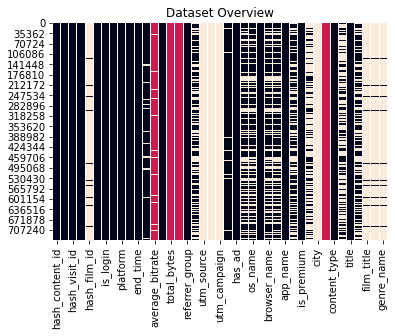

 Categerocial   Numeric   NaN 


In [17]:
heatmap = df.isnull()
for k,v in dic_cols.items():
    if v == "num":
       heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
    else:
       heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)
sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')
plt.show()
print("\033[1;37;40m Categerocial ", "\033[1;30;41m Numeric ", "\033[1;30;47m NaN ")

From the data, We already check the categorical and numeric aspect in the Dataset. We also detects there are NaN values in the data. The next step is cleansing the data and consider which data is going to used. In the dataset I consider to go with view times, content_type and play_duration